# A quickstart for LMR Turbo (LMRt)

In this quickstart, we will demostrate how to use LMR Turbo (LMRt) to perform LMR analysis.
First, let's import the packages, among which `LMRt` is the LMR Turbo module, and `visual` is the visualizaion module for results plotting.

In [1]:
%load_ext autoreload
%autoreload 2

from slmr import LMRt
from slmr import visual as vs

from pprint import pprint
import os
import numpy as np
import pandas as pd
import pickle
import time

## Initiate a reconstuction job

In [2]:
job = LMRt.ReconJob()

pid=19681 >>> job.cfg created


The job.cfg contains the default settings of the job, and we can print it out to have a check

In [3]:
# pprint(job.cfg, depth=3)

We may also overwrite the default configurations with a yaml file

In [4]:
job.load_cfg('./cfg/cfg_update.yml')
# pprint(job.cfg, depth=3)

pid=19681 >>> job.cfg updated


Or we may just use dot notation to update the specific configurations.
This way is much cleaner as every setting is explicitly listed in this Jupyter notebook.
Therefore, we recommend the users to follow this way.

In [5]:
# let's update the number of ensemble members
job.cfg.core.nens = 100
# pprint(job.cfg, depth=3)

That's it for configuration.
Let's move on to loading prior.

## Load prior

It is easy to load prior in LMRt.
We don't have to maintain a certain directory structure nor certain filenames.
Instead, we just feed the correct file, whereever it is.

In [6]:
filepath='/home/fzhu/SynologyDrive/Dev/Github/LMRv2/input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc'
job.load_prior(filepath, verbose=True, seed=0)

Reading file: /home/fzhu/SynologyDrive/Dev/Github/LMRv2/input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc
Anomalies provided as the prior: Removing the temporal mean (for every gridpoint)...
tas: Global(monthly): mean=6.791441364839557e-07, std-dev=0.8304356932640076
State vector information:
{'tas_sfc_Amon': {'pos': (0, 13823), 'spacecoords': ('lat', 'lon'), 'spacedims': (96, 144), 'vartype': '2D:horizontal'}}
shape of Xb: (13824 x 100)
seed= 0
sampled inds= [864, 394, 776, 911, 430, 41, 265, 988, 523, 497, 414, 940, 802, 849, 310, 488, 366, 597, 913, 929, 223, 516, 142, 288, 143, 773, 97, 633, 818, 256, 931, 545, 722, 829, 616, 923, 150, 317, 101, 747, 75, 920, 870, 700, 338, 483, 573, 103, 362, 444, 323, 625, 655, 934, 209, 565, 984, 453, 886, 533, 266, 63, 824, 561, 14, 95, 736, 860, 408, 727, 844, 803, 684, 640, 1, 626, 505, 847, 888, 341, 249, 960, 333, 720, 891, 64, 195, 581, 227, 244, 822, 145, 909, 556, 458, 93, 82, 327, 896, 520]
pid=19681 >>

Now the object `job.prior` is created, and we can check prior values by `pprint` the `job.prior.prior_dict`

In [7]:
# pprint(job.prior.prior_dict)

## Load proxies

Similarly, to load proxies, we need to feed the correct files by specifying their paths.

In [8]:
dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data'

db_proxies_filename = 'LMRdb_v0.4.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v0.4.0_Metadata.df.pckl'
linear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'

precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

job.load_proxies(
    os.path.join(dirpath, db_proxies_filename),
    os.path.join(dirpath, db_metadata_filename),
    precalib_filesdict=precalib_filesdict,
    seed=0, verbose=False,
)

print(len(job.proxy_manager.all_proxies))
print(len(job.proxy_manager.ind_assim))
print(len(job.proxy_manager.ind_eval))

pid=19681 >>> job.proxy_manager created
                                 Bivalve_d18O:    1
               Corals and Sclerosponges_Rates:    8
                Corals and Sclerosponges_SrCa:   20
                Corals and Sclerosponges_d18O:   47
                        Ice Cores_MeltFeature:    1
                               Ice Cores_d18O:   22
                                 Ice Cores_dD:    6
                              Lake Cores_Misc:    2
                             Lake Cores_Varve:    4
                       Tree Rings_WidthPages2:  248
                                        TOTAL:  359
479
359
120


## Load Ye

Now let's load the pre-calculated Ye files

In [9]:
dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data'
linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'

ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

job.load_ye_files(ye_filesdict, verbose=True)

-------------------------------------------
Loading Ye files for proxy set: assim
-------------------------------------------
Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data/icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz

Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data/icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz

Now extracting proxy type-dependent Ye values...

-------------------------------------------
Loading Ye files for proxy set: eval
-------------------------------------------
Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data/icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz

Loading precalculated Ye from:
 /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data

## Perform the data assimilation procedure

Now it's time to perform the data assimilation procedure.
Currently there are two Kalman Filter solvers: one is from the normal LMR program `job.run_da`, which is correct but very slow, and another is from LMRlite `job.run_da_lite`, which is much faster but yields incorrect results, and we are still working on it.

In [11]:
%%time
job.run_da_lite(verbose=False)  # using the solver from LMRlite

KF updating (pid=5617):   0%|          | 2/2000 [00:00<02:39, 12.50it/s]

pid=5617 >>> Recon. period: 0...2000


KF updating (pid=5617): 100%|██████████| 2000/2000 [02:52<00:00,  8.83it/s]

pid=5617 >>> job.da created
CPU times: user 16min 2s, sys: 962 ms, total: 16min 3s
Wall time: 2min 52s


## Monte-Carlo iterations

To perform Monte-Carlo iterations, we need to repeat the workflow above with different randomization seeds.
Here we have the `job.run()` method to do it conveniently.
We can set the paramter `seed` to use different seeds, and set the parameter `mode='normal'` to call the normal LMR solver or `mode='lite'` to call the LMRlite solver.

In [10]:
# files to use
prior_filepath = '/home/fzhu/SynologyDrive/Dev/Github/LMRv2/input/data/model/icesm_last_millennium/tas_sfc_Amon_iCESM_past1000_085001-184912.nc'

dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/data'

db_proxies_filename = 'LMRdb_v0.4.0_Proxies.df.pckl'
db_metadata_filename = 'LMRdb_v0.4.0_Metadata.df.pckl'
db_proxies_filepath = os.path.join(dirpath, db_proxies_filename)
db_metadata_filepath = os.path.join(dirpath, db_metadata_filename)

linear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_ref1951-1980_cal1850-2015.pckl'
bilinear_precalib_filename = 'PSMs_LMRdb_v0.4.0_seasonPSM_GISTEMP_GPCC_ref1951-1980_cal1850-2015.pckl'
precalib_filesdict = {
    'linear': os.path.join(dirpath, linear_precalib_filename),
    'bilinear': os.path.join(dirpath, bilinear_precalib_filename),
}

linear_filename = 'icesm_last_millennium-tas_sfc_Amon-anom_linear_seasonPSM-GISTEMP_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'
bilinear_filename = 'icesm_last_millennium-pr_sfc_Amon-tas_sfc_Amon-anom_bilinear_seasonPSM-T:GISTEMP-PR:GPCC_ref1951-1980_cal1850-2015_LMRdbv0.4.0.npz'
ye_filesdict = {
    'linear': os.path.join(dirpath, linear_filename),
    'bilinear': os.path.join(dirpath, bilinear_filename),
}

In [13]:
print(job.cfg.core.recon_period)

(0, 2000)


In [14]:
%%time

seeds = np.arange(2)
print(f'Seeds={seeds}')

save_dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial'
for seed in seeds:
    start = time.time()
    
    print(f'pid={os.getpid()} >>> seed={seed}')
    job = LMRt.ReconJob()
    job.run(prior_filepath, db_proxies_filepath, db_metadata_filepath,
         precalib_filesdict=precalib_filesdict, ye_filesdict=ye_filesdict,
         seed=seed, save_dirpath=save_dirpath, mode='normal')
        
    end = time.time()
    time_used = (end-start)/60.0
    print(f'pid={os.getpid()} >>> Time used: {time_used} mins\n')

Seeds=[0 1]
pid=19681 >>> seed=0
pid=19681 >>> job.cfg created
pid=19681 >>> job.prior created
pid=19681 >>> job.prior regridded
pid=19681 >>> job.proxy_manager created



KF updating (pid=19681):   0%|          | 1/2000 [00:00<06:15,  5.33it/s]

pid=19681 >>> job.ye created
pid=19681 >>> Recon. period: 0...2000



KF updating (pid=19681): 100%|██████████| 2000/2000 [56:53<00:00,  3.10s/it]

pid=19681 >>> job.da created
pid=19681 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r00.pkl
pid=19681 >>> Time used: 57.02275787591934 mins

pid=19681 >>> seed=1
pid=19681 >>> job.cfg created
pid=19681 >>> job.prior created
pid=19681 >>> job.prior regridded
pid=19681 >>> job.proxy_manager created



KF updating (pid=19681):   0%|          | 1/2000 [00:00<06:17,  5.30it/s]

pid=19681 >>> job.ye created
pid=19681 >>> Recon. period: 0...2000



KF updating (pid=19681): 100%|██████████| 2000/2000 [56:23<00:00,  3.11s/it]

pid=19681 >>> job.da created
pid=19681 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_serial/job_r01.pkl
pid=19681 >>> Time used: 56.517594850063325 mins

CPU times: user 7h 33min 10s, sys: 14.6 s, total: 7h 33min 24s
Wall time: 1h 53min 32s


To plot the results, just tell the function `vs.plot_gmt_ts_from_jobs` the path of the directory where we save the results.

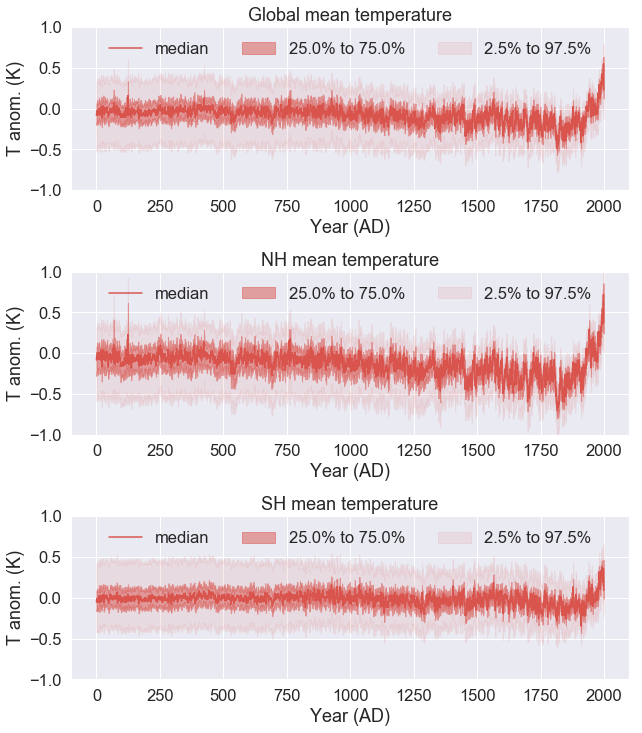

In [15]:
fig = vs.plot_gmt_ts_from_jobs(save_dirpath)

## Multiprocessing

We can also use `multiprocessing` to parallel the program with different seeds.

In [16]:
%%time
from multiprocessing import Pool

seeds = np.arange(2)
print(f'Seeds={seeds}')

jobs_parallel = []
for seed in seeds:
    job = LMRt.ReconJob()
    jobs_parallel.append(job)
    
save_dirpath = '/home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_parallel'
def func_wrapper(job, seed):
    print(f'pid={os.getpid()} >>> seed={seed}')
    return job.run(prior_filepath, db_proxies_filepath, db_metadata_filepath,
                   precalib_filesdict=precalib_filesdict, ye_filesdict=ye_filesdict,
                   save_dirpath=save_dirpath,
                   seed=seed, mode='normal')
    
with Pool(processes=2) as pool:
    pool.starmap(func_wrapper, zip(jobs_parallel, seeds))

Seeds=[0 1]
pid=19681 >>> job.cfg created
pid=19681 >>> job.cfg created
pid=6779 >>> seed=0
pid=6780 >>> seed=1
pid=6779 >>> job.prior created
pid=6780 >>> job.prior created
pid=6779 >>> job.prior regridded
pid=6780 >>> job.prior regridded
pid=6779 >>> job.proxy_manager created
pid=6780 >>> job.proxy_manager created
pid=6779 >>> job.ye created
pid=6779 >>> Recon. period: [0, 2000)



KF updating (pid=6779):   0%|          | 0/2000 [00:00<?, ?it/s]

pid=6780 >>> job.ye created
pid=6780 >>> Recon. period: [0, 2000)



KF updating (pid=6779): 100%|██████████| 2000/2000 [1:26:43<00:00,  4.71s/it]

pid=6779 >>> job.da created
pid=6779 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_parallel/job_r00.pkl



KF updating (pid=6780): 100%|██████████| 2000/2000 [1:27:14<00:00,  3.30s/it]

pid=6780 >>> job.da created
pid=6780 >>> Saving job.da to: /home/fzhu/SynologyDrive/Dev/Github/sLMR/slmr/LMRt/output/jobs_parallel/job_r01.pkl
CPU times: user 6.55 s, sys: 1.87 s, total: 8.42 s
Wall time: 1h 27min 22s


With two processors, it can be seen that the total amount of time is reduced from about 1 hr 53 mins to about 1 hr 27 mins, which is good (about 23% less time) but not as good as we expect.
This is due to the overhead caused by pickling data and the limited CPU parallel computing performance of my laptop.
This situation can be improved on a cluster where different nodes can be leveraged.

Now we can plot the results and get the identical figure.

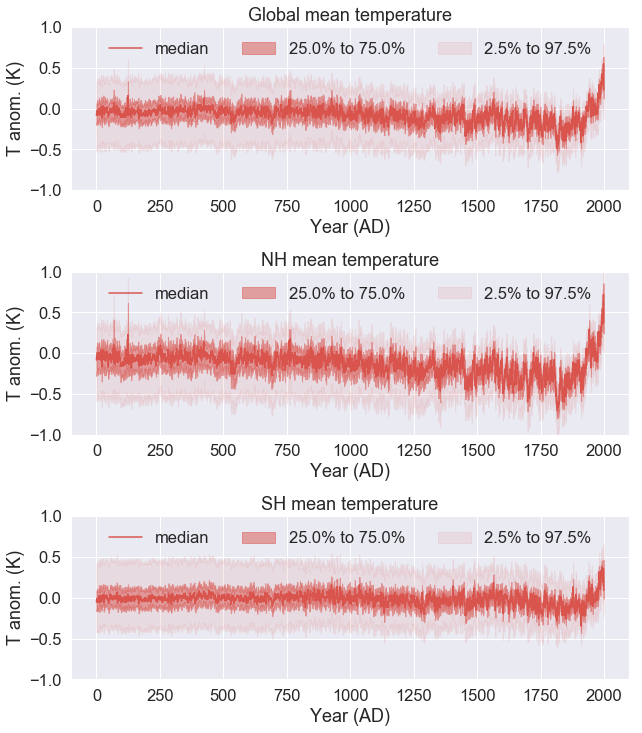

In [17]:
fig = vs.plot_gmt_ts_from_jobs(save_dirpath)

## Summary

LMRt aims to provide a packaged version of the LMR framework.
It is inspired by LMR_lite.py originated by Greg Hakim (Univ. of Washington).

Pros: less code; more flexibility
+ No need to specify fixed paths or directory structures; only need to feed the correct files
+ Interactive style (Jupyter notebook, ipython shell); keep a clean experiment record when use a Jupyter notebook
+ Output whatever you want from the object ReconJob()
+ Easy for parallel computing
+ For experiments such as pseudoproxy/PSM exps., only need to replace the files to feed (as long as the files follow the pre-defined format)

Cons: still in beta
+ The current version only keeps the minimal part of code, and it can only handle priors in netCDF format with lat/lon dimensions; other priors with vertical 2-D are not supported yet
+ build_ye_files(), which is related to PSMs, is still under development